In [1]:
'''
uses objects to calculate iv2 and then puts those into dataframe and list
'''
import os
import pickle
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import obspy
import earthquake
import util


from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
from obspy.clients.fdsn import Client
import cartopy.crs as ccrs
import matplotlib.patches as patches
import pandas as pd
import cartopy.feature as cf

from datetime import date

#+++++++PLOTTING++++++++++
# LINE_BY_MAG_TYPE = True
# COLOR_BY_MAG_TYPE = True

In [2]:
list_mag = []
list_dist = []
list_iv2 = []
list_mag_types = []

ROOT = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'
eq_list = os.listdir(ROOT)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

eq_with_data = []
cat_with_data = obspy.Catalog()  # cat.copy()
# cat_with_data.clear()
for event in cat:  # check earthquakes have data AND PICKS
    eq_name = util.catEventToFileName(event)
    if (os.path.isdir(ROOT+eq_name) and
            os.path.isdir(ROOT+eq_name+'/station_xml_files') and
            os.path.exists(ROOT+eq_name+'/picks.pkl')):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [4]:
cat_with_data[0].magnitudes[0].magnitude_type

'mb'

In [17]:
to_plot_list = []
for cat_entry in cat_with_data:
    if cat_entry.magnitudes[0].magnitude_type[0:2].lower() in ['ml','mw','mb','md']:
        to_plot_list.append([cat_entry.origins[0].latitude, cat_entry.origins[0].longitude, cat_entry.origins[0].depth, cat_entry.magnitudes[0].mag, cat_entry.magnitudes[0].magnitude_type[0:2].lower(), cat_entry.origins[0].time])
to_plot=pd.DataFrame(to_plot_list, columns = ['lat', 'long', 'depth', 'mag', 'mag_type', 'time'])

In [18]:
to_plot

,lat,long,depth,mag,mag_type,time
0,-20.4865,-69.0165,102120.0,4.20,mb,2019-01-31T19:49:49.660000Z
1,8.9782,-83.7578,13590.0,4.90,mw,2019-01-31T13:09:53.370000Z
2,56.2980,-149.2590,19350.0,4.10,ml,2019-01-31T13:03:50.890000Z
3,17.9571,-68.3945,52000.0,3.09,md,2019-01-31T10:16:56.840000Z
4,53.5228,-167.2692,8590.0,3.00,ml,2019-01-31T08:55:20.080000Z
...,...,...,...,...,...,...
6069,6.7486,125.0659,10000.0,4.90,mb,2019-11-01T06:07:56.131000Z
6070,40.5178,20.8117,13690.0,4.70,mw,2019-11-01T05:25:45.815000Z
6071,-9.1434,106.9878,10000.0,4.60,mb,2019-11-01T05:08:34.368000Z
6072,-8.5492,147.4826,10000.0,4.70,mb,2019-11-01T02:32:42.580000Z


In [7]:
cat_entry.__dict__

{'resource_id': smi:service.iris.edu/fdsnws/event/1/query?eventid=11058889,
 'event_type': 'earthquake',
 'event_type_certainty': None,
 'creation_info': None,
 'preferred_origin_id': smi:service.iris.edu/fdsnws/event/1/query?originid=39464688,
 'preferred_magnitude_id': smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=195053049,
 'preferred_focal_mechanism_id': None,
 'event_descriptions': [EventDescription(text='CENTRAL CALIFORNIA', type='Flinn-Engdahl region')],
 'comments': [],
 'picks': [],
 'amplitudes': [],
 'focal_mechanisms': [],
 'origins': [Origin
	   resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=39464688")
	          time: UTCDateTime(2019, 7, 6, 6, 34, 47, 460000)
	     longitude: -117.726669
	      latitude: 35.895168
	         depth: 7470.0
	 creation_info: CreationInfo(author='ci,us')],
 'magnitudes': [Magnitude
	    resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=195053049")
	      

In [8]:
fig

NameError: name 'fig' is not defined

In [6]:
        colors = ['#ed8b00','#dd4124','#0f85a0','#edd746']
        #colors = ['#625a95','#cc5c75','#f47947','#f7ac2b']
        groups = to_plot.groupby(['mag_type'])
        for  j,(k,v) in enumerate(groups):
            axs.scatter(np.array(v.mag)+np.transpose(np.random.uniform(-0.05, 0.05, size=(len(v.mag),1))), np.log10(v.iv2*(v.dist**2)),
                       color = colors[j],
                       alpha = 0.5,
                       marker = '.',
                       label = k + ',' + str(len(v.mag_type)))
            dist_corr_mult = v.iv2*(v.dist**2)
            mag_plot = v.mag
            initial_guess = (1.4,0)
            res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
            def obj(to_opt):
                '''optimisation function'''
                a_opt=to_opt[0]
                b_opt=to_opt[1]
                #importance = np.array(n)
                y_real= np.log10(dist_corr_mult)
                x_list = np.array(mag_plot)
                y_guess = (a_opt*x_list+b_opt)
                #print(y_guess)
                return sum(abs(y_guess-y_real))
            x = np.arange(min(mag_plot), max(mag_plot), 0.1)
            y = res.x[0] * x + res.x[1]
            axs.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]), color = colors[j])

NameError: name 'axs' is not defined

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_1346014/480833185.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1752: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = matplotlib.axes.Axes.scatter(self, *args, **kwargs)


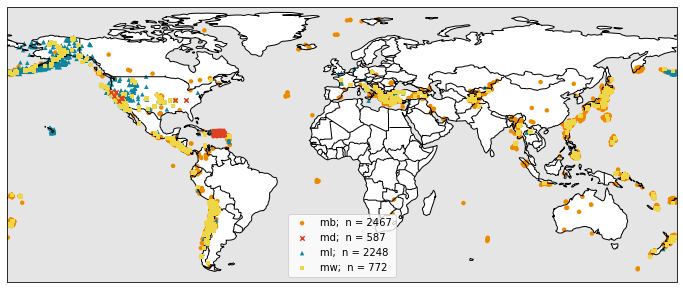

In [24]:
#%matplotlib qt
import cartopy.feature as cfeature
colors = {'ml':'#0f85a0','mw':'#edd746','mb':'#ed8b00','md':'#dd4124'}
import matplotlib as mpl#markers = {'ml':'x','mw':'o','mb':'x','md':'^'}
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cfeature.OCEAN, color = 'silver', alpha = 0.4)
ax.add_feature(cfeature.LAND,color='white')
colors = {'ml':'#0f85a0','mw':'#edd746','mb':'#ed8b00','md':'#dd4124'}
#pts = ax.scatter(to_plot['long'], to_plot['lat'], c = list(to_plot.mag_type.map(colors)), marker = 'o', alpha = 0.5)
colors = ['#ed8b00','#dd4124','#0f85a0','#edd746']
groups = to_plot.groupby(['mag_type'])
markers = ['o','x','^','s']
zorders = [0,3,1,2]
for  j,(k,v) in enumerate(groups):
    ax.scatter(v.long,v.lat,
               color = colors[j],
               alpha = 1,
               marker = markers[j],
               s = 20,
               zorder = zorders[j],
               label = k + ';  n = ' + str(len(v.mag_type)),
              edgecolors='none')
im_ratio = ax.bbox.width/ax.bbox.height
#plt.colorbar(pts, fraction=0.01*im_ratio, pad=0.04, label='mag')
#for key in colors.keys():
#    ax.scatter(180,0, c = colors[key], label = key, marker = 'o')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/datasets/map_by_magnitude_type.png')

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_1346014/1599466930.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


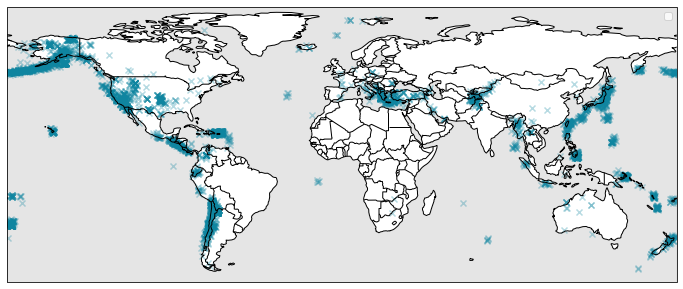

In [64]:
#%matplotlib qt
import cartopy.feature as cfeature
colors = {'ml':'#0f85a0','mw':'#edd746','mb':'#ed8b00','md':'#dd4124'}
import matplotlib as mpl#markers = {'ml':'x','mw':'o','mb':'x','md':'^'}
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cfeature.OCEAN, color = 'silver', alpha = 0.4)
ax.add_feature(cfeature.LAND,color='white')
colors = {'ml':'#0f85a0','mw':'#edd746','mb':'#ed8b00','md':'#dd4124'}
#pts = ax.scatter(to_plot['long'], to_plot['lat'], c = list(to_plot.mag_type.map(colors)), marker = 'o', alpha = 0.5)
colors = ['#ed8b00','#dd4124','#0f85a0','#edd746']
groups = to_plot.groupby(['mag_type'])
markers = ['o','x','^','s']
zorders = [0,3,1,2]
im = ax.scatter(to_plot.long,to_plot.lat,
               alpha = 0.3,
               vmax = 100, 
               c = '#0f85a0',
               marker = 'x')
#               c = to_plot.depth/1000,
#               cmap = 'plasma_r',
#im_ratio = ax.bbox.width/ax.bbox.height
#cbar = plt.colorbar(im, fraction=0.02*im_ratio, pad=0.04, label='depth (km)')
#cbar.ax.minorticks_on()
#cbar.ax.set_yticks(np.arange(0,105,5))
#cbar.ax.set_yticks(np.arange(0,110,20), ['0', '20','40','60','80','100+'])
#plt.colorbar(pts, fraction=0.01*im_ratio, pad=0.04, label='mag')
#for key in colors.keys():
#    ax.scatter(180,0, c = colors[key], label = key, marker = 'o')
plt.legend()
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/datasets/map_by_magnitude_type.png')

In [30]:
max(to_plot.depth)/1000

667.39

In [8]:
# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/
from datetime import timedelta
dates = to_plot['time']
min_date = date(np.min(dates).year, np.min(dates).month, np.min(dates).day)-timedelta(days = 5)
max_date = date(np.max(dates).year, np.max(dates).month, np.max(dates).day)+timedelta(days = 20)

In [23]:
dates

0       2019-01-31T19:49:49.660000Z
1       2019-01-31T13:09:53.370000Z
2       2019-01-31T13:03:50.890000Z
3       2019-01-31T10:16:56.840000Z
4       2019-01-31T08:55:20.080000Z
                   ...             
3381    2019-07-06T06:47:08.090000Z
3382    2019-07-06T06:47:07.980000Z
3383    2019-07-06T06:41:16.710000Z
3384    2019-07-06T06:41:15.080000Z
3385    2019-07-06T06:34:47.460000Z
Name: time, Length: 3386, dtype: object

In [24]:
np.random.rand()

0.4633622782315042

([], [])

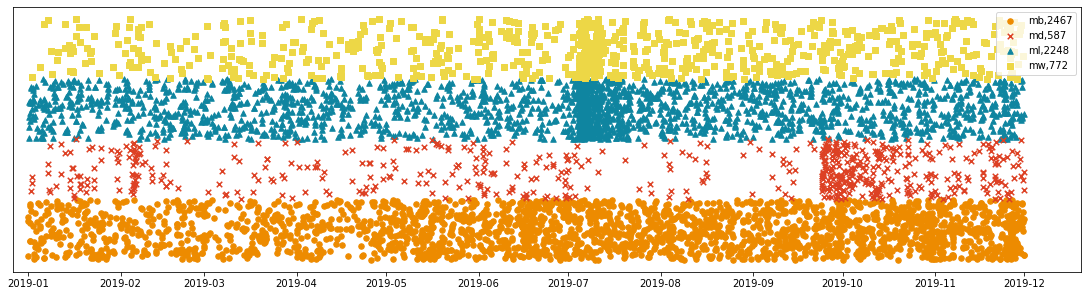

In [20]:
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
#_ = ax.set_ylim(-0.1, 1.1)
_ = ax.set_xlim(min_date, max_date)
#_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
y = np.random.rand(len(dates))
#_ = ax.scatter(dates, y, s=120, c = list(to_plot.mag_type.map(colors)), marker = '.')

colors = ['#ed8b00','#dd4124','#0f85a0','#edd746']
groups = to_plot.groupby(['mag_type'])
markers = ['o','x','^','s']
zorders = [0,3,1,2]

for  j,(k,v) in enumerate(groups):
    ax.scatter(v.time,np.zeros(len(v.time))+j+np.random.rand(len(v.time)),
               color = colors[j],
               alpha = 1,
               marker = markers[j],
               s = 30,
               zorder = zorders[j],
               label = k + ',' + str(len(v.mag_type)))
plt.legend()
plt.yticks([])

In [12]:
to_plot.groupby(['mag_type'])

In [15]:
for key, item in groups:
    print(groups.get_group(key), "\n\n")

          lat      long     depth  mag mag_type                         time
0    -20.4865  -69.0165  102120.0  4.2       mb  2019-01-31T19:49:49.660000Z
6    -23.5661  -68.2039  135040.0  4.2       mb  2019-01-31T05:42:01.530000Z
7     13.4636  -88.3658  180610.0  5.2       mb  2019-01-31T04:40:30.240000Z
12    23.9792   94.4999   82030.0  4.0       mb  2019-01-30T23:12:59.480000Z
17    12.3767  -87.7238   59350.0  4.5       mb  2019-01-30T11:41:02.470000Z
...       ...       ...       ...  ...      ...                          ...
6067  36.5015   31.4629   89460.0  4.1       mb  2019-11-01T10:17:04.544000Z
6070   6.7486  125.0659   10000.0  4.9       mb  2019-11-01T06:07:56.131000Z
6072  -9.1434  106.9878   10000.0  4.6       mb  2019-11-01T05:08:34.368000Z
6073  -8.5492  147.4826   10000.0  4.7       mb  2019-11-01T02:32:42.580000Z
6074 -22.5768  -66.0455  261610.0  4.3       mb  2019-11-01T00:17:21.991000Z

[2467 rows x 6 columns] 


          lat     long    depth   mag mag_type  

Text(0.5, 0, 'depth (km)')

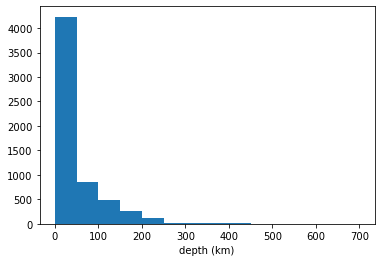

In [54]:
n, bins, _ = plt.hist(to_plot.depth/1000, np.arange(0, 750, 50))
plt.xlabel('depth (km)')

In [53]:
n

array([4.232e+03, 8.540e+02, 4.960e+02, 2.570e+02, 1.260e+02, 2.500e+01,
       8.000e+00, 1.800e+01, 1.200e+01, 5.000e+00, 2.000e+00, 1.000e+00,
       4.000e+00, 1.000e+00])

In [56]:
max(to_plot.depth)/1000

667.39

In [67]:
%pip install progressbar

.environ: No such file or directory.
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=a149db73881d1c992f4625ca67d292f330e18e76d71c45812c4b06b4bdd083ad
  Stored in directory: /home/users/ug16g06/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar
Note: you may need to restart the kernel to use updated packages.


In [72]:
to_plot.keys()

Index(['lat', 'long', 'depth', 'mag', 'mag_type', 'time'], dtype='object')

In [90]:
i

12

In [91]:
j

'20190130_231259.a'

In [100]:
from progressbar import Percentage, Bar
pbar = ProgressBar(widgets=[Percentage(), Bar()], maxval=len(some_list_of_data)).start()
for i,j in enumerate(some_list_of_data):
    time.sleep(1)
    pbar.update(i+1)
pbar.finish()

100%|############################################################################################################|
